#  MultiTimeFrame Shifting Predictive Bollinger Bands
This script was originally inspired by [MultiTimeFrame Shifting Predictive Bollinger Bands](https://www.tradingview.com/script/cRuc33Sk-MultiTimeFrame-Shifting-Predictive-Bollinger-Bands/) created by [informanerd](https://www.tradingview.com/u/informanerd/).


## What Are Bollinger Bands?
Bollinger Bands are a popular technical analysis tool developed by John Bollinger in the 1980s. They are used to measure **market volatility** and identify **overbought or oversold** conditions in the trading of financial instruments. 

## How They Work
Bollinger Bands consist of three lines:
- **Middle Band:** Typically a simple moving average (SMA) that serves as the base for the upper and lower bands.
- **Upper Band:** Calculated by adding a standard deviation multiplied by a factor (usually two) to the middle band.
- **Lower Band:** Calculated by subtracting a standard deviation multiplied by a factor (usually two) from the middle band.

The area between the upper and lower bands represents the Bollinger Band range. The width of this range varies based on the volatility of the prices; it widens during periods of high volatility and narrows during periods of low volatility.

## Application in Trading
Bollinger Bands are used in various trading strategies. Here are a few common applications:
- **Volatility Analysis:** They provide a relative definition of high and low volatility. Traders can assess how volatile the market is and can adjust their trading strategies accordingly.
- **Trend Identification:** When the bands come close together, constricting the moving average, it is called a 'squeeze'. A squeeze signals a period of low volatility and is considered by traders to be a potential indicator of future increased volatility and possible trading opportunities.
- **Overbought/Oversold Conditions:** Traders use Bollinger Bands to identify overbought or oversold conditions. Prices are considered high at the upper band and low at the lower band.
- **Breakouts:** Price moves that occur outside of the bands are considered significant. For example, a price breakout above the upper band may signal an upcoming continuation of an uptrend.

## Historical Context
John Bollinger's contribution to technical analysis was through the concept of measuring volatility dynamically by using standard deviations and moving averages, which was a novel approach at the time. Since their introduction, Bollinger Bands have become one of the most reliable and widely used tools by traders to analyze price action in the financial markets.

# MultiTimeFrame Shifting Predictive Bollinger Bands
Predictive Bollinger Bands extend the concept of traditional Bollinger Bands by using statistical and machine learning methods to forecast where the bands might lie in the future. This approach provides traders with potential insights into future price movements, volatility, and trend continuations or reversals.

## MultiTimeFrame Analysis
MultiTimeFrame analysis involves looking at the same asset under different time frames to get a broader perspective on the market's direction. It helps traders understand both long-term trends and short-term fluctuations.

## Shifting Predictive Bollinger Bands
Shifting Predictive Bollinger Bands incorporate the element of time shift, which projects the bands into the future. This time-shifted approach enables traders to visualize potential future support and resistance levels and **prepare for possible market movements before they occur**, in this way, they are a potential **leading indicator**, rather than a lagging indicator.

## MultiTimeFrame Shifting Predictive Bollinger Bands
Combining MultiTimeFrame analysis with Shifting Predictive Bollinger Bands, traders can analyze **how short-term price movements fit into the broader, long-term trend**. This comprehensive method provides a nuanced view of the market, taking into account the interplay between different time frames and **projected future volatility**.

## Application in Trading
Traders can use MultiTimeFrame Shifting Predictive Bollinger Bands to:
- **Enhance Strategy Development:** By considering multiple time frames, traders can fine-tune their entry and exit points.
- **Improve Risk Management:** Forecasting future price ranges across different time frames helps in setting more effective stop-loss and take-profit orders.
- **Identify Confluence:** Seeing alignment or divergence in the bands across time frames can indicate stronger signals for trades.

## Creating MultiTimeFrame Shifting Predictive Bollinger Bands
To create these bands, traders often:
- **Analyze Multiple Time Frames:** Such as combining daily, weekly, and monthly charts.
- **Use Forecasting Models:** Applying models suitable for each time frame and then combining the forecasts.
- **Shift the Predicted Bands Forward:** To visualize potential future market behavior.

## Challenges and Considerations
- **Complexity of Analysis:** Requires careful interpretation as signals may differ across time frames.
- **Computational Demand:** More data and processing power are needed to forecast across multiple time frames.
- **Market Dynamics:** Rapid market changes can undermine the predictions, necessitating real-time adjustment to the models.
- **Model Accuracy:** The predictive power of these bands relies heavily on the accuracy of the underlying forecasting model.
- **Market Conditions:** Unforeseen market events can cause actual price movements to deviate significantly from predicted ones.
- **Overfitting Risk:** Models that are too complex or finely tuned to historical data may not perform well on future, unseen data.




In [ ]:
!pip install plotly
!pip install nbformat>=4.2.0

In [ ]:
!pip install plotly --upgrade


In [42]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import yfinance as yf

In [43]:
def bollinger_bands(series, period, num_std):
    rolling_mean = series.rolling(window=period).mean()
    rolling_std = series.rolling(window=period).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, rolling_mean, lower_band

def calculate_ema(data, period):
    alpha = 2 / (period + 1)
    return data.ewm(alpha=alpha, adjust=False).mean()

def calculate_dema(data, period):
    ema1 = calculate_ema(data, period)
    ema2 = calculate_ema(ema1, period)
    return 2 * ema1 - ema2


# Define a function to compute the moving averages according to the type.
def moving_average(df, ma_type, period):
    if ma_type == "DEMA":
        return calculate_dema(df, period)
    elif ma_type == "EMA":
        return calculate_ema(df, period)
    elif ma_type == "SMA":
        return df.rolling(window=period).mean()


# Define the function to shift the series for prediction
def predict_moving_average(series, period):
    return series.rolling(window=period).mean().shift(-period)

# Calculate predictive Bollinger Bands by shifting the bands forward
def calculate_predictive_bands(series, period, num_std, shift_periods):
    upper_band, middle_band, lower_band = bollinger_bands(series, period, num_std)
    # Shift the calculated bands forward by the shift_periods
    predictive_upper_band = upper_band.shift(periods=shift_periods)
    predictive_lower_band = lower_band.shift(periods=shift_periods)
    # For the predicted SMA, simply use the shifted rolling mean
    predictive_middle_band = middle_band.shift(periods=shift_periods)
    return predictive_upper_band, predictive_middle_band, predictive_lower_band



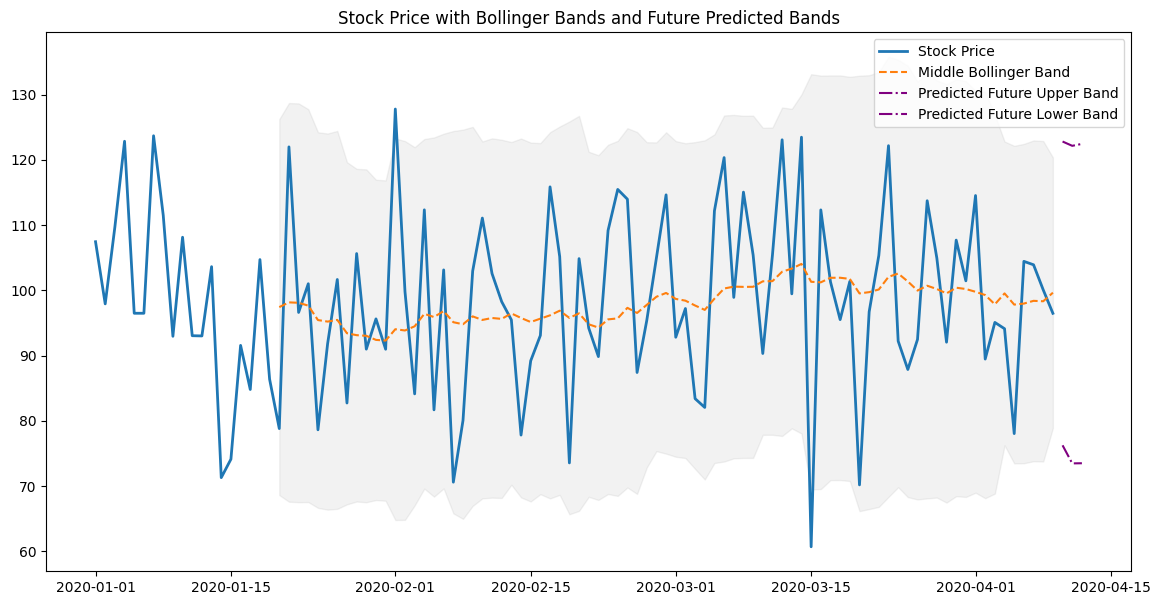

In [44]:
# Sample data creation: Let's create a DataFrame to simulate stock price data
np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=100, freq='D')
prices = pd.Series(np.random.normal(100, 15, size=len(dates)), index=dates)

# Calculate the SMA for period 20
sma20 = moving_average(prices, ma_type="SMA", period=20)

# Compute Bollinger Bands for period 20 with 2 standard deviations
upper_band, middle_band, lower_band = bollinger_bands(prices, period=20, num_std=2)

# Predict the SMA for 3 periods ahead
predicted_sma = predict_moving_average(prices, period=3)

# Generate future dates for the prediction, beyond the last date of the known prices
num_future_periods = 3  # For example, let's predict 3 future periods
future_dates = pd.date_range(start=prices.index[-1], periods=num_future_periods + 1, freq='D')[1:]

# Calculate the predictive bands for 3 periods ahead
predicted_upper_band, predicted_middle_band, predicted_lower_band = calculate_predictive_bands(prices, period=20, num_std=2, shift_periods=num_future_periods)

# Trim the predicted bands to include only the last 'num_future_periods' values
valid_future_upper = predicted_upper_band.iloc[-num_future_periods:]
valid_future_lower = predicted_lower_band.iloc[-num_future_periods:]
valid_future_dates = future_dates[:len(valid_future_upper)]

# Plot only the future part of the predictive bands, discarding any NaN values
plt.figure(figsize=(14, 7))
plt.plot(prices.index, prices, label='Stock Price', linewidth=2)
plt.plot(middle_band.index, middle_band, label='Middle Bollinger Band', linestyle='--')

# Ensure that only the future, non-NaN part of the predictive bands is plotted
# We also ensure that future dates are aligned with the future bands' values
plt.plot(valid_future_dates, valid_future_upper, label='Predicted Future Upper Band', linestyle='-.', color='purple')
plt.plot(valid_future_dates, valid_future_lower, label='Predicted Future Lower Band', linestyle='-.', color='purple')

plt.fill_between(middle_band.index, lower_band, upper_band, color='grey', alpha=0.1)
plt.title('Stock Price with Bollinger Bands and Future Predicted Bands')
plt.legend()
plt.show()

## Interpretation & Improvements
The above section is only inteded to prototype how the indicator should look. This does not use real data, nor should it be used to trade.
The next section improves on this with real data and interactive charting, but still is not for practical purposes.

In [49]:

# Fetch Bitcoin data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# Compute Bollinger Bands
def compute_bollinger_bands(series, window=20, num_std=2):
    sma = series.rolling(window).mean()
    std = series.rolling(window).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return sma, upper_band, lower_band

# Plot interactive Bollinger Bands including predictions
def plot_bollinger_bands_interactive_with_predictions(prices, sma, upper_band, lower_band, predicted_upper, predicted_lower):
    dates = prices.index
    future_dates = [dates[-1] + timedelta(days=i) for i in range(1, 4)]
    
    fig = make_subplots(rows=1, cols=1)
    
    # Actual price and Bollinger Bands
    fig.add_trace(go.Scatter(x=dates, y=prices, name='BTC Price', line=dict(color='blue', width=2)))
    fig.add_trace(go.Scatter(x=dates, y=upper_band, name='Upper Band', line=dict(color='red', dash='dash')))
    fig.add_trace(go.Scatter(x=dates, y=sma, name='Middle Band', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=dates, y=lower_band, name='Lower Band', line=dict(color='red', dash='dash')))
    
    # Predicted Bollinger Bands
    fig.add_trace(go.Scatter(x=future_dates, y=predicted_upper, name='Predicted Upper Band', line=dict(color='purple', dash='dot')))
    fig.add_trace(go.Scatter(x=future_dates, y=predicted_lower, name='Predicted Lower Band', line=dict(color='purple', dash='dot')))
    
    fig.update_layout(title='Bitcoin Prices and Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
    fig.show()

# Get the BTC data
btc_data = fetch_data('BTC-USD', '2022-01-01', datetime.now().strftime('%Y-%m-%d'))

# Compute Bollinger Bands
sma, upper_band, lower_band = compute_bollinger_bands(btc_data)

# Assuming a simple predictive mechanism for demonstration (e.g., using the last value to predict future)
# In reality, you would replace this with a more sophisticated forecasting model
last_diff_upper = upper_band.diff().iloc[-3:].mean()
last_diff_lower = lower_band.diff().iloc[-3:].mean()
predicted_upper = upper_band.iloc[-1] + np.array([last_diff_upper * i for i in range(1, 4)])
predicted_lower = lower_band.iloc[-1] + np.array([last_diff_lower * i for i in range(1, 4)])

# Plot everything
plot_bollinger_bands_interactive_with_predictions(btc_data, sma, upper_band, lower_band, predicted_upper, predicted_lower)


[*********************100%%**********************]  1 of 1 completed

# Reflection on the Original Approach
This code snippet provides a structured approach to fetching Bitcoin data, calculating the Bollinger Bands, and making a basic prediction for the next 3 days. The plot will display actual prices and Bollinger Bands up to the current date, along with the predicted upper and lower bands for the next 3 future dates.

Please note, the predictive part used here is quite simplistic and meant for **illustrative purposes**. For accurate forecasting, you'd likely need a more complex model considering various factors influencing Bitcoin's price.

# Alternitive Approaches Worth Exploring
1. GARCH (Generalized Autoregressive Conditional Heteroskedasticity)
2. VAR (Vector Autoregression): Useful if you want to forecast the system of multiple interrelated time series and the impact of each one on the others.
3. SARIMA (Seasonal ARIMA): Extension of ARIMA that supports univariate time series data with a seasonal component.
4. Deep Learning Models such as Long Short-Term Memory Networks (LSTMs) and Gated Recurrent Units (GRUs): Designed to overcome the vanishing gradient problem and capture long-term dependencies in sequence data.
5. Hybrid Models: Combining different types of models to take advantage of their complementary strengths, such as ARIMA-GARCH or LSTM with ARIMA.\
